In [ ]:
# Install the pydicom library if not already installed
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.4 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import pydicom
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# Read a single DICOM file from the specified path
pydicom_file = pydicom.dcmread('/dicom_dir/ID_0015_AGE_0061_CONTRAST_1_CT.dcm')

In [6]:
pydicom_file

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.612696157451530634003461974920
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0000) Group Length                        UL: 458
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.6

In [ ]:
# Print specific metadata fields from the DICOM file
print("pydicom_file[0x0008,0x0032]:",pydicom_file[0x0008,0x0032])
print("pydicom_file.AcquisitionTime :",pydicom_file.AcquisitionTime )

pydicom_file[0x0008,0x0032]: (0008,0032) Acquisition Time                    TM: '083734.355000'
pydicom_file.AcquisitionTime : 083734.355000


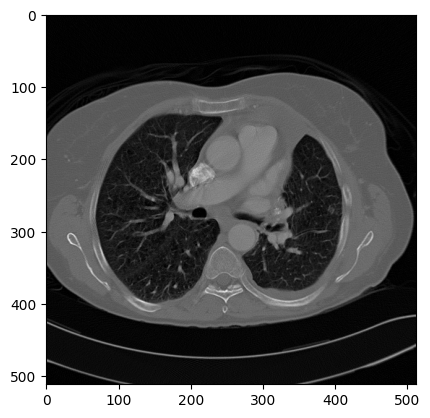

In [ ]:
# Extract the pixel data from the DICOM file and store it as a CT image
ct = pydicom_file.pixel_array
plt.figure()
plt.imshow(ct,cmap='gray')

In [ ]:
# Define the path to the directory containing DICOM files
path_ct = Path('/dicom_dir')

In [ ]:
# Get a list of all files in the DICOM directory
all_files = list(path_ct.glob("*"))

In [ ]:
# Initialize an empty list to store DICOM data
ct_data=[]
# Loop through all files in the directory and read each DICOM file
for path in all_files:
  data = pydicom.dcmread(path)
  ct_data.append(data)

In [ ]:
# Sort the DICOM data by SliceLocation to ensure correct order
ct_data_sorted = sorted(ct_data , key= lambda slice: slice.SliceLocation)
# Print the SliceLocation of the first 10 slices
for slice in ct_data_sorted[:10]:
  print(slice.SliceLocation)

-1168.4
-948.5
-948.2
-918.5
-901
-874
-874
-816.5
-795.030
-763.5


In [ ]:
# Initialize an empty list to store pixel arrays of all slices
all_slice =[]
# Extract pixel arrays from sorted DICOM data
for slice in ct_data_sorted:
  all_slice.append(slice.pixel_array)
len(all_slice)

100

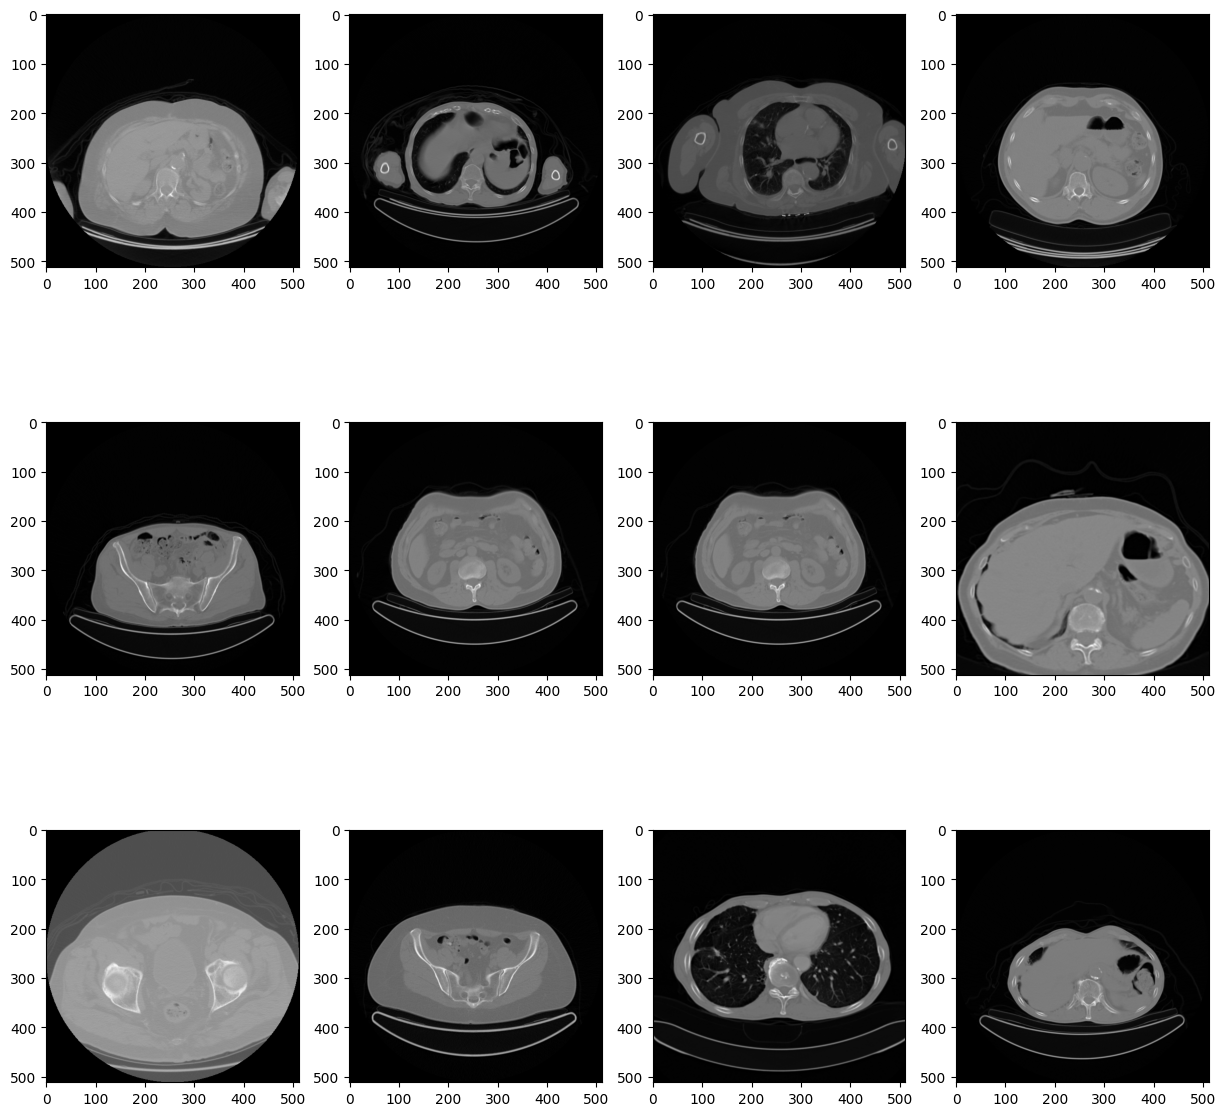

In [ ]:
# Create a 3x4 grid of subplots for displaying slices
fig , axis = plt.subplots(3,4,figsize = (15,15))
# Initialize a counter for selecting slices to display
slice_counter = 0
# Loop through the 3x4 grid and display the first 12 slices
for i in range (3):
  for j in range (4):
    axis[i][j].imshow(all_slice[slice_counter],cmap = 'gray')
    slice_counter +=1